# Empirical PDFs



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

21 21


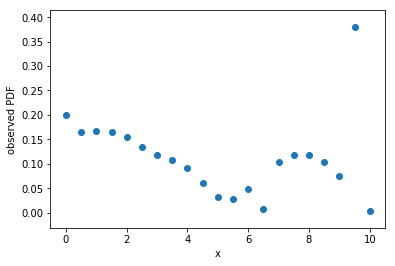

In [6]:
xs = [0.0,0.5,1.0,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10.0]
ys= [0.2,0.165,0.167,0.166,0.154,0.134,0.117,0.108,0.092,0.06,0.031,0.028,0.048,0.007,0.103,0.119,0.119,0.103,0.074,0.38,0.003]
print(len(xs),len(ys))
plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("observed PDF");

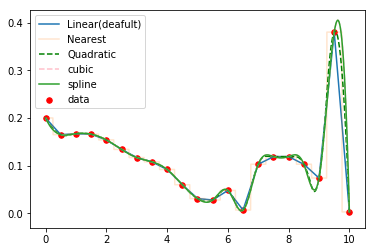

In [31]:
from scipy.interpolate import interp1d
from scipy.interpolate import splev,splrep
x = np.linspace(min(xs),max(xs),1000)
plt.scatter(xs,ys,s=30,label="data",c="r")
y1 = interp1d(xs,ys)(x)
y2 = interp1d(xs,ys,kind="nearest")(x)
y3 = interp1d(xs,ys,kind="quadratic")(x)
y4 = interp1d(xs,ys,kind="cubic")(x)
y5 = splev(x,splrep(xs,ys))
plt.plot(x,y1,label="Linear(deafult)")
plt.plot(x,y2,label="Nearest",alpha=0.2)
plt.plot(x,y3,label="Quadratic",ls="--",c="green")
plt.plot(x,y4,label="cubic",ls="--",c="pink")
plt.plot(x,y5,label="spline",ls="-")
plt.legend();
#spline and cubic are same but spilne is faster

In [37]:
from scipy.integrate import simps
def get_prob(xs,ys,a,b,resolution=1000):
    x_norms = np.linspace(min(xs),max(xs),resolution)
    y_norms =interp1d(xs,ys,kind="quadratic")(x_norms)
    x_vals = np.linspace(a,b,resolution)
    normalization = simps(y_norms,x=x_norms)
    y_vals = interp1d(xs,ys,kind="quadratic")(x_vals)
    return simps(y_vals,x=x_vals)/normalization
def get_cdf(xs,ys,v):
    return get_prob(xs,ys,min(xs),v)
def get_sf(xs,ys,v):
    return 1-get_cdf(xs,ys,v)
print(get_prob(xs,ys,0,10))

1.0


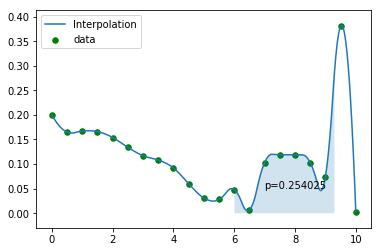

In [41]:
v1,v2 = 6,9.3
area = get_prob(xs,ys,v1,v2)
plt.scatter(xs,ys,s=30,label="data" ,color="green")
plt.plot(x,y3,linestyle="-",label="Interpolation")
plt.fill_between(x,0,y3,where=(x>=v1)&(x<=v2),alpha=0.2)
plt.annotate(f"p={area:3f}",(7,0.05))
plt.legend();

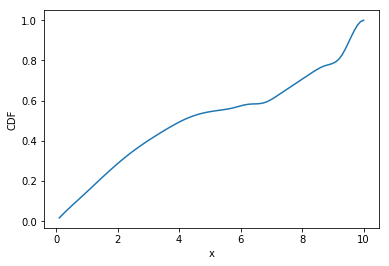

In [44]:
x_new = np.linspace(min(xs),max(xs),100)
cdf_new = [get_cdf(xs,ys,i) for i in x_new]
cheap_cdf = y3.cumsum()/y3.sum()
plt.plot(x_new,cdf_new,label = "Super cheap pdf for specific cases")
plt.ylabel("CDF")
plt.xlabel("x");